In [1]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import FuncFormatter
import numpy as np

#%% 

from astropy import constants as ast

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs
#%%


from scipy import constants as sci
pi = sci.pi

#%%
eta_0 = 2.96e12 #son aproximadamente los 47k anios donde domina la rad
eta_b = 21969.3   #escala del bounce
a_b = 7.41155e-9 #factor de normalizacion del factor de escala
xini = eta_0/eta_b  #cte inicial en funcion de x

#definimos cte de normalizacion 
rho_rad_ini = (3*c**2/(8*pi*G))*(1/(a_b*eta_b)**2)*xini**2*(1+xini**2)**(-3)  #dens de rad inicial [erg/cm^3]
#beta = 1e-15
#beta_obs = 0.99999999999999 #el dato observacional 
#beta = beta_obs/(1-beta_obs)
beta =1e-10
rho_bh_ini = beta*rho_rad_ini   

alfa = 2.36


In [23]:
M_min_1 = m_sol
M_max_1 = m_sol*1e6

cteA_1 = (rho_bh_ini*(2-alfa))/(c**2*(M_max_1**(2-alfa)-M_min_1**(2-alfa)))
print(cteA_1)

7.209461617130594e-18


In [2]:
M_min_2 = 1e16
M_max_2 = m_sol*1e6

cteA_2 = (rho_bh_ini*(2-alfa))/(c**2*(M_max_2**(2-alfa)-M_min_2**(2-alfa)))
print(cteA_2)

4.240584121332505e-24


In [3]:
num_eta = 100000

eta_pos = np.logspace(-20, 13, num_eta)
eta_neg = -eta_pos[::-1] 
eta_int = np.concatenate((eta_neg, [0], eta_pos))
x_int = eta_int/eta_b

In [27]:
rho_bh_1 = np.zeros_like(eta_int) 
M_i_graf_1 = np.zeros_like(eta_int) 
N_graf_1 = np.zeros_like(eta_int) 

Nm = 100000
Masas = np.logspace(np.log10(M_min_1), np.log10(M_max_1),Nm)

delta_1 = np.zeros_like(Masas)

hlog = (M_max_1/M_min_1)**(1/(Nm-1))
print(hlog)

i = 0
for x in x_int:
    a = a_b*(1+x**2)**(1/2) #factor de escala
    for M in Masas:
        M_i = M*a
        N_i = cteA_1*M**(-alfa)*a**(-3)   #densidad inicial de bhs en el bloque i

        delta = M*(hlog-1)

        rho_bh_1[i] = rho_bh_1[i]+ N_i*M_i*c**2*delta

        M_i_graf_1[i] = M_i_graf_1[i] + M_i
        N_graf_1[i] = N_graf_1[i]+ N_i

    i = i+1

rho_bh_norm = rho_bh_1/rho_bh_ini



1.0001381660311914


In [4]:
rho_bh_2 = np.zeros_like(eta_int) 
M_i_graf_2 = np.zeros_like(eta_int) 
N_graf_2 = np.zeros_like(eta_int) 

Nm = 1000
Masas = np.logspace(np.log10(M_min_2), np.log10(M_max_2),Nm)

hlog = (M_max_2/M_min_2)**(1/(Nm-1))
print(hlog)

i = 0
for x in x_int:
    a = a_b*(1+x**2)**(1/2) #factor de escala
    for M in Masas:
        M_i = M*a
        N_i = cteA_2*M**(-alfa)*a**(-3)   #densidad inicial de bhs en el bloque i

        delta = M*(hlog-1)

        rho_bh_2[i] = rho_bh_2[i]+ N_i*M_i*c**2*delta

        M_i_graf_2[i] = M_i_graf_2[i] + M_i
        N_graf_2[i] = N_graf_2[i]+ N_i

    i = i+1

rho_bh_norm_2 = rho_bh_2/rho_bh_ini

1.0551685243495603


In [5]:
print(x_int[100000])
print(rho_bh_2[100000])

#para nm = 100 rho_bh_2 en eta =0 es 489315406.65395343
#para nm = 1000 rho_bh_2 en eta=0 es 347416757.2591064 y tardo 8 minutos en correr
#para nm = 10000 rho_bh_2 en eta=0 es 336148680.4354993 y tardo 108 minutos en correr 


0.0
347416757.2591064


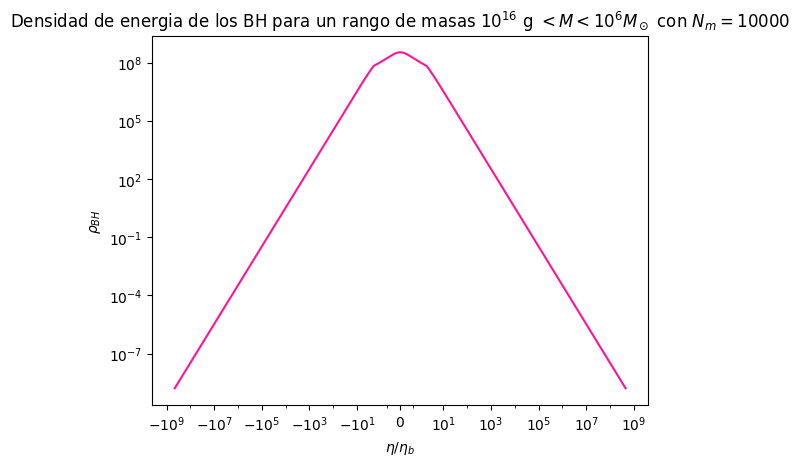

In [16]:
# plot results
fig, ax = plt.subplots()

plt.plot(x_int, rho_bh_2, color='deeppink')
plt.xlabel(r'$\eta/\eta_b$')
plt.xscale('symlog')
plt.ylabel(r'$\rho_{BH}$')
plt.yscale('log')

plt.title(r'Densidad de energia de los BH para un rango de masas $10^{16}$ g $<M<10^6 M_\odot$ con $N_m = 10000$')

intervalo = [10**1, 10**3, 10**5, 10**7, 10**9]
int_neg = -np.array(intervalo)[::-1]

ticks_x = np.concatenate((int_neg, [0], intervalo))
ax.set_xticks(ticks_x)

plt.show()

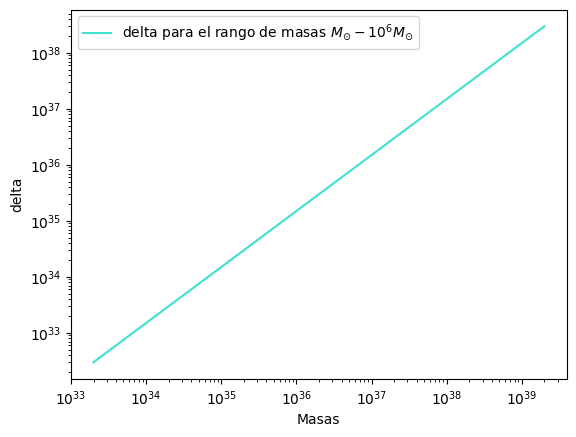

In [20]:
Nm = 10000
Masas1 = np.logspace(np.log10(M_min_1), np.log10(M_max_1),Nm)

delta_1 = np.zeros_like(Masas1)

hlog = (M_max_1/M_min_1)**(1/(Nm-1))

j=0
for M in Masas1:
     delta_1[j] = delta_1[j]+ M*(hlog-1)
     j = j+1

plt.plot(Masas1,delta_1, color = 'turquoise', label=r'delta para el rango de masas $M_{\odot} - 10^6 M_{\odot}$')
plt.xlabel('Masas')
plt.ylabel('delta')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()


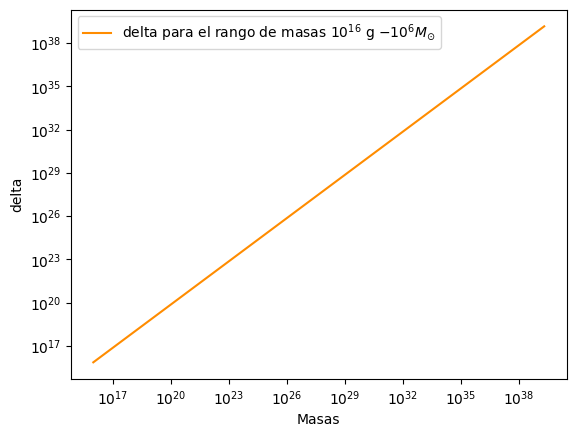

In [6]:

Masas2 = np.logspace(np.log10(M_min_2), np.log10(M_max_2),Nm)

delta_2 = np.zeros_like(Masas2)

hlog = (M_max_2/M_min_2)**(1/(Nm-1))

j=0
for M in Masas2:
     delta_2[j] = delta_2[j]+ M*(hlog-1)
     j = j+1

plt.plot(Masas2,delta_2, color= 'darkorange', label=r'delta para el rango de masas $10^{16}$ g $- 10^6 M_{\odot}$')
plt.xlabel('Masas')
plt.ylabel('delta')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()


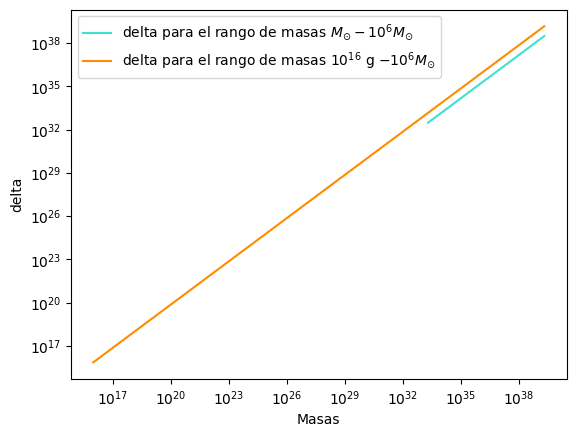

In [21]:
plt.plot(Masas1,delta_1, color = 'turquoise', label=r'delta para el rango de masas $M_{\odot} - 10^6 M_{\odot}$')
plt.plot(Masas2,delta_2, color= 'darkorange', label=r'delta para el rango de masas $10^{16}$ g $- 10^6 M_{\odot}$')
plt.xlabel('Masas')
plt.ylabel('delta')
plt.xscale('log')
plt.yscale('log')
plt.legend()

plt.show()


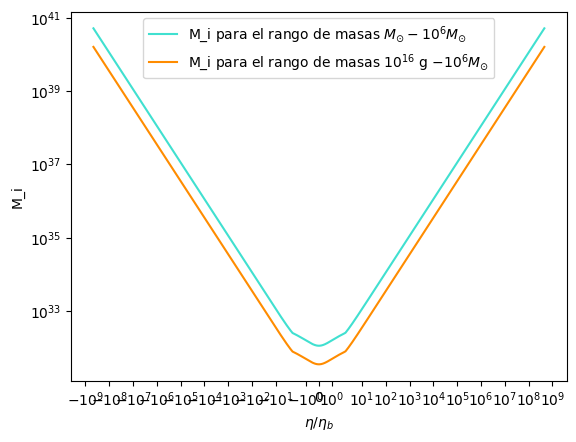

In [11]:
plt.plot(x_int,M_i_graf_1, color = 'turquoise', label=r'M_i para el rango de masas $M_{\odot} - 10^6 M_{\odot}$')
plt.plot(x_int,M_i_graf_2, color= 'darkorange', label=r'M_i para el rango de masas $10^{16}$ g $- 10^6 M_{\odot}$')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylabel('M_i')
plt.xscale('symlog')
plt.yscale('log')
plt.legend()

plt.show()

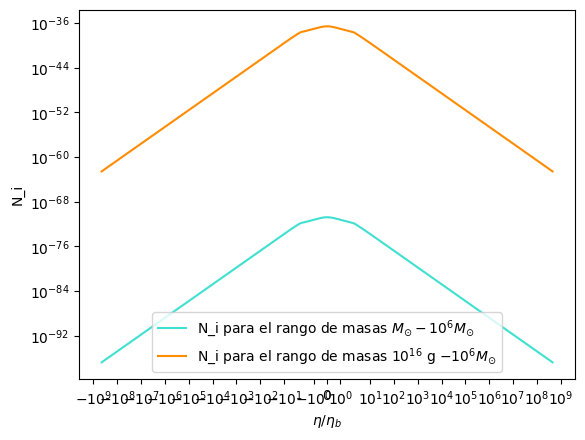

In [12]:
plt.plot(x_int,N_graf_1, color = 'turquoise', label=r'N_i para el rango de masas $M_{\odot} - 10^6 M_{\odot}$')
plt.plot(x_int,N_graf_2, color= 'darkorange', label=r'N_i para el rango de masas $10^{16}$ g $- 10^6 M_{\odot}$')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylabel('N_i')
plt.xscale('symlog')
plt.yscale('log')
plt.legend()
 
plt.show()

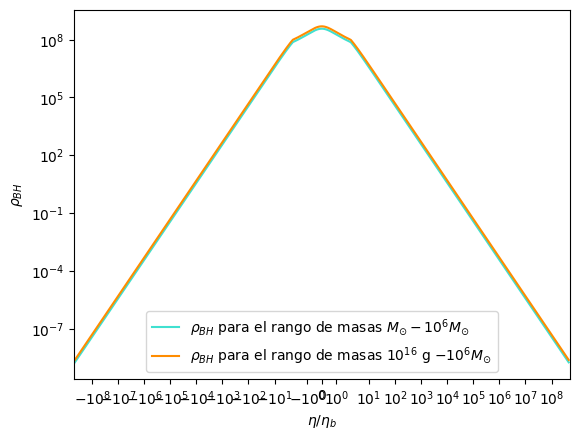

In [22]:
plt.plot(x_int,rho_bh_1, color = 'turquoise', label=r'$\rho_{BH}$ para el rango de masas $M_{\odot} - 10^6 M_{\odot}$')
plt.plot(x_int,rho_bh_2, color= 'darkorange', label=r'$\rho_{BH}$ para el rango de masas $10^{16}$ g $- 10^6 M_{\odot}$')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylabel(r'$\rho_{BH}$')
plt.yscale('log')
plt.xscale('symlog')
plt.legend()

plt.show()


In [13]:
mult_2 = M_i_graf_2* N_graf_2

mult_1 = M_i_graf_1* N_graf_1

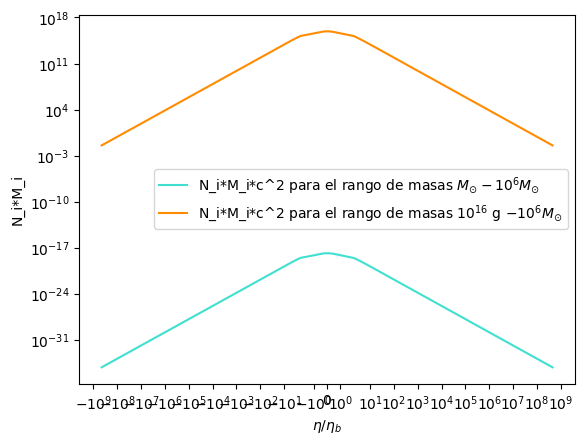

In [16]:
plt.plot(x_int,mult_1*c**2, color = 'turquoise', label=r'N_i*M_i*c^2 para el rango de masas $M_{\odot} - 10^6 M_{\odot}$')
plt.plot(x_int,mult_2*c**2, color= 'darkorange', label=r'N_i*M_i*c^2 para el rango de masas $10^{16}$ g $- 10^6 M_{\odot}$')
plt.xlabel(r'$\eta/\eta_b$')
plt.ylabel('N_i*M_i')
plt.xscale('symlog')
plt.yscale('log')
plt.legend()

plt.show()